<a href="https://colab.research.google.com/github/alpha597/ML_LAB_ASSIGNMENTS/blob/main/ML_LAB_Breast_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [32]:
data = pd.read_csv('/content/sample_data/wdbc.data', header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [33]:
data.shape
print(len(data))
cloumns = data.columns
print(len(cloumns))

569
32


In [36]:
data.columns = ['ID', 'diagonasis', 'radius1', 'texture1', 'perimeter1', 'area1', 'smoothness1', 'compactness1', 'concavity1', 'concave_points1', 'symmetry1', 'fractal_dimension1',  'radius2', 'texture2', 'perimeter2', 'area2', 'smoothness2', 'compactness2', 'concavity2', 'concave_points2', 'symmetry2' , 'fractal_dimension2'
,'radius3', 'texture3', 'perimeter3', 'area3', 'smoothness3', 'compactness3', 'concavity3', 'concave_points3', 'symmetry3' , 'fractal_dimension3' ]



In [37]:
data.head()

,ID,diagonasis,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [42]:
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
le = LabelEncoder()
data['diagonasis'] = le.fit_transform(data['diagonasis'])
data.sample(frac=1).reset_index(drop=True)


,ID,diagonasis,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,917897,0,9.847,15.68,63.00,293.2,0.09492,0.08419,0.02330,0.02416,...,11.24,22.99,74.32,376.5,0.14190,0.22430,0.08434,0.06528,0.2502,0.09209
1,85382601,1,17.020,23.98,112.80,899.3,0.11970,0.14960,0.24170,0.12030,...,20.88,32.09,136.10,1344.0,0.16340,0.35590,0.55880,0.18470,0.3530,0.08482
2,867387,0,15.710,13.93,102.00,761.7,0.09462,0.09462,0.07135,0.05933,...,17.50,19.25,114.30,922.8,0.12230,0.19490,0.17090,0.13740,0.2723,0.07071
3,862717,1,13.610,24.98,88.05,582.7,0.09488,0.08511,0.08625,0.04489,...,16.99,35.27,108.60,906.5,0.12650,0.19430,0.31690,0.11840,0.2651,0.07397
4,904647,0,11.930,10.91,76.14,442.7,0.08872,0.05242,0.02606,0.01796,...,13.80,20.14,87.64,589.5,0.13740,0.15750,0.15140,0.06876,0.2460,0.07262
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,9110732,1,17.750,28.03,117.30,981.6,0.09997,0.13140,0.16980,0.08293,...,21.53,38.54,145.40,1437.0,0.14010,0.37620,0.63990,0.19700,0.2972,0.09075
565,9111596,0,11.870,21.54,76.83,432.0,0.06613,0.10640,0.08777,0.02386,...,12.79,28.18,83.51,507.2,0.09457,0.33990,0.32180,0.08750,0.2305,0.09952
566,884626,0,12.890,14.11,84.95,512.2,0.08760,0.13460,0.13740,0.03980,...,14.39,17.70,105.00,639.1,0.12540,0.58490,0.77270,0.15610,0.2639,0.11780
567,8911164,0,11.890,17.36,76.20,435.6,0.12250,0.07210,0.05929,0.07404,...,12.40,18.99,79.46,472.4,0.13590,0.08368,0.07153,0.08946,0.2220,0.06033


In [43]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data.iloc[:,2:] = scaler.fit_transform(data.iloc[:,2:])
print(data)

           ID  diagonasis   radius1  texture1  perimeter1     area1  \
0      842302           1  1.097064 -2.073335    1.269934  0.984375   
1      842517           1  1.829821 -0.353632    1.685955  1.908708   
2    84300903           1  1.579888  0.456187    1.566503  1.558884   
3    84348301           1 -0.768909  0.253732   -0.592687 -0.764464   
4    84358402           1  1.750297 -1.151816    1.776573  1.826229   
..        ...         ...       ...       ...         ...       ...   
564    926424           1  2.110995  0.721473    2.060786  2.343856   
565    926682           1  1.704854  2.085134    1.615931  1.723842   
566    926954           1  0.702284  2.045574    0.672676  0.577953   
567    927241           1  1.838341  2.336457    1.982524  1.735218   
568     92751           0 -1.808401  1.221792   -1.814389 -1.347789   

     smoothness1  compactness1  concavity1  concave_points1  ...   radius3  \
0       1.568466      3.283515    2.652874         2.532475  ...  1.8

In [45]:
from sklearn.model_selection import train_test_split
temp = data.drop(['ID'], axis=1)
X = temp.drop(['diagonasis'], axis=1)
y = temp['diagonasis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
gnb = GaussianNB()
X_train_copy = X_train.copy()
X_test_copy = X_test.copy()
gnb.fit(X_train_copy, y_train)
y_pred = gnb.predict(X_test_copy)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

[[70  1]
 [ 3 40]]


In [50]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()

bnb.fit(X_train_copy, y_train)
y_pred = bnb.predict(X_test_copy)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99        71
           1       0.98      0.98      0.98        43

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

[[70  1]
 [ 1 42]]


In [51]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion='gini', splitter='best')
dtc.fit(X_train_copy, y_train)
y_pred = dtc.predict(X_test_copy)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        71
           1       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114

[[68  3]
 [ 3 40]]


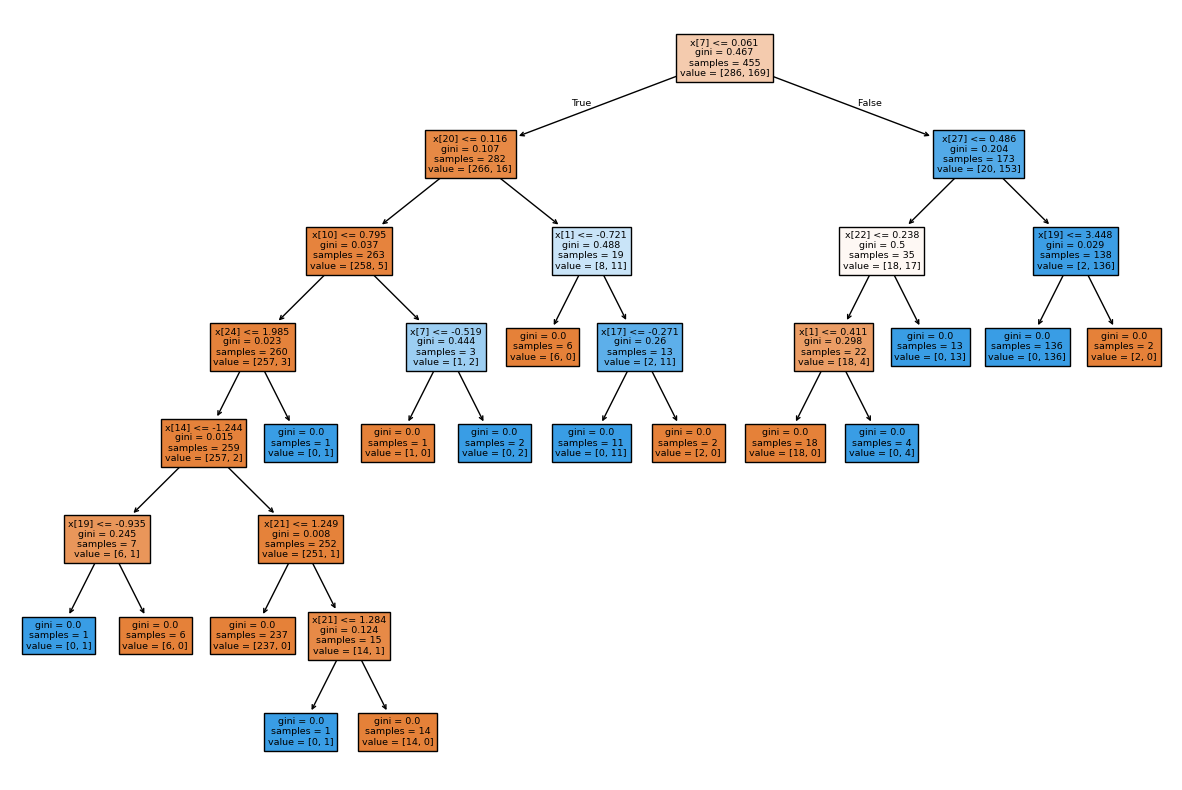

In [52]:
from sklearn.tree import plot_tree
plt.figure(figsize=(15,10))
plot_tree(dtc, filled=True)
plt.show()